In [1]:
import torch
from dpm.models import BernoulliNaiveBayes
from dpm.visualize import plot_stats
import numpy as np

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1).float()
y.shape

torch.Size([3000, 1])

In [3]:
np.random.binomial(size=(3, 3), n=1, p=0.6)

array([[0, 1, 0],
       [1, 1, 0],
       [1, 0, 1]])

In [4]:
x = torch.cat((torch.tensor(np.random.binomial(size=(1000, 10), n=1, p=0.7)), 
               torch.tensor(np.random.binomial(size=(2000, 10), n=1, p=0.2))), dim=0).float()
x.shape

torch.Size([3000, 10])

In [5]:
model = BernoulliNaiveBayes()

In [6]:
model.log_prob(x, y)

tensor([ -7.6386,  -7.2692,  -8.2313,  ..., -12.3350, -13.2618, -11.2342],
       grad_fn=<SumBackward2>)

In [7]:
model.y_dist.probs

Parameter containing:
tensor([0.0257], requires_grad=True)

In [8]:
stats = model.fit(x, y)

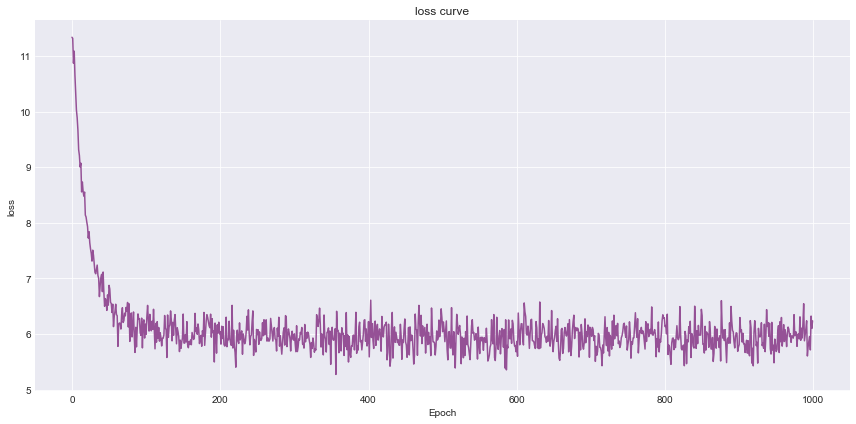

In [9]:
plot_stats(stats)

In [10]:
model.y_dist.probs

Parameter containing:
tensor([0.6641], requires_grad=True)

In [11]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9670)

In [12]:
model.x_dist[0].probs

Parameter containing:
tensor([0.7464, 0.6947, 0.7174, 0.6606, 0.6622, 0.6852, 0.6896, 0.6948, 0.7511,
        0.6995], requires_grad=True)

In [13]:
model.x_dist[1].probs

Parameter containing:
tensor([0.2363, 0.1787, 0.2196, 0.1924, 0.1786, 0.2173, 0.2052, 0.1926, 0.1883,
        0.1978], requires_grad=True)

In [14]:
X = model.sample(5)
print(X)
print(X.mean(dim=1))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 0., 0., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 0., 0., 0., 1., 1.],
        [1., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<IndexBackward>)
tensor([1.0000, 0.6000, 0.6000, 0.8000, 0.0000], grad_fn=<MeanBackward2>)


In [15]:
model.predict(X)

tensor([[0],
        [0],
        [0],
        [0],
        [1]])

In [16]:
x_s, y_s = model.sample(5, return_y=True)
x_s.shape, y_s.shape

(torch.Size([5, 10]), torch.Size([5, 1]))

In [20]:
(model.predict(x_s) == y_s).float().mean()

tensor(1.)